# <center style="color:red"> **Linear Discriminant Analysis** </center>  

<h4 style="text-align:right">By Trần Minh Dương</h4>  

# Overview  

Linear discriminant analysis (LDA) is a statistical method for reducing redundant and noisy information from an original sample to its essential features.

# Steps

Let's break down LDA step by step by dealing with an example

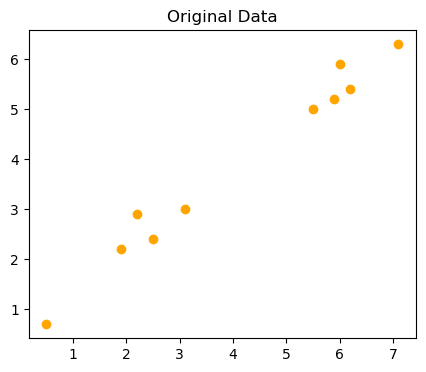

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Sample dataset (2 features, 2 classes)
data = np.array([
    [2.5, 2.4, 0], [0.5, 0.7, 0], [2.2, 2.9, 0], [1.9, 2.2, 0], [3.1, 3.0, 0],
    [7.1, 6.3, 1], [5.9, 5.2, 1], [6.2, 5.4, 1], [6.0, 5.9, 1], [5.5, 5.0, 1]
])

plt.figure(figsize=(5,4))
plt.scatter(data[:,0],data[:,1],color='orange')
plt.title("Original Data")
plt.show()

## Objective:
We want to find a unit vector v  such that:

$$
\max_{\mathbf{v} : \|\mathbf{v}\| = 1} \frac{(\mu_1 - \mu_2)^2}{s_1^2 + s_2^2}.
$$

Where:
+ $\mu_j = v^T  m_j $ : mean of each class projected on vector $v$
+ $s_j^2 = \sum_{i} (v^T  x_i - \mu_j)^2$ : variances of the projected classes

The optimal $\mathbf{v}$ should be such that

+   $(\mu_1 - \mu_2)^2: \text{large}$
+   $s_1^2, s_2^2: \text{both small}$

## Step 0: Separate classes
Since LDA is a supervised method, we can divide the dataset into their corresponding groups thanks to their labels.

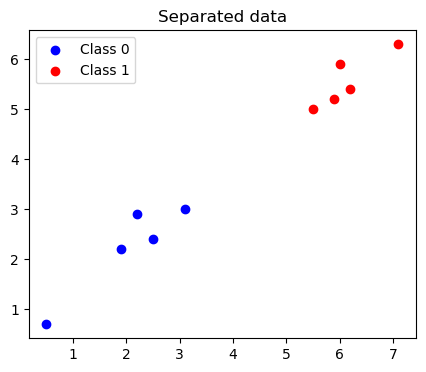

In [3]:
# Step 0: Separate classes
X_0 = data[data[:, -1] == 0][:, :-1]  # Class 0
X_1 = data[data[:, -1] == 1][:, :-1]  # Class 1
# data[:, -1] == 0 is the mask that selects only those with label 0
# [:,:-1] removes the last column (label), preserving features only

plt.figure(figsize=(5, 4))

# Plot original data in 2D
plt.scatter(X_0[:, 0], X_0[:, 1], color='blue', label='Class 0')
plt.scatter(X_1[:, 0], X_1[:, 1], color='red', label='Class 1')
plt.legend()
plt.title("Separated data")
plt.show()

## Step 1: Compute the mean
Calculate the mean vectors for each class

Mean vector for Class 0: 2.04 2.2399999999999998
Mean vector for Class 1: 6.14 5.56


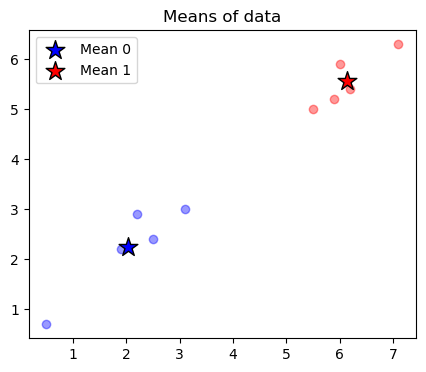

In [4]:
# Step 1: Compute mean vectors
mu_0 = np.mean(X_0, axis=0)
mu_1 = np.mean(X_1, axis=0)

print("Mean vector for Class 0:", mu_0[0], mu_0[1])
print("Mean vector for Class 1:", mu_1[0], mu_1[1])

plt.figure(figsize=(5, 4))

# Plot the data points
plt.scatter(X_0[:, 0], X_0[:, 1], alpha=0.4, color='blue')
plt.scatter(X_1[:, 0], X_1[:, 1], alpha=0.4, color='red')

# Plot the means
plt.scatter(mu_0[0], mu_0[1], color='blue', marker="*", s=200, edgecolors='black', label='Mean 0')
plt.scatter(mu_1[0], mu_1[1], color='red', marker="*", s=200, edgecolors='black', label='Mean 1')

plt.legend()
plt.title("Means of data")
plt.show()

## Step 2: Within-class scatter matrix

$
\begin{align}
    s_j^2 &= \sum_i (v^T x_i - v^T m_j)^2 \\
    &= \sum_i v^T (x_i - m_j)(x_i - m_j)^T v \\
    &= v^T \left[ \sum_i (x_i - m_j)(x_i - m_j)^T \right] v \\
    &= v^T S_j v
\end{align}
$

where 
$
S_j = \sum_i (x_i - m_j)(x_i - m_j)^T \in \mathbb{R}^{d \times d}
$
is called the within-class scatter matrix for class \( j \).

Thus, combining gives the **total within-class scatter** of the two classes in the projection space is  

$$
s_1^2 + s_2^2 = v^T S_1 v + v^T S_2 v = v^T (S_1 + S_2) v = v^T S_w v
$$

where  

$$
S_w = S_1 + S_2 = \sum_{x_i \in C_1} (x_i - m_1)(x_i - m_1)^T + \sum_{x_i \in C_2} (x_i - m_2)(x_i - m_2)^T
$$

is called the **total within-class scatter matrix** of the original data.



In [5]:
# Step 2: Compute within-class scatter matrix Sw
S_w = np.zeros((2, 2))

diff0 = X_0 - mu_0.T #transpose mu to convert from row to column vector
S_0 = diff0.T @ diff0

diff1 = X_1 - mu_1.T
S_1 = diff1.T @ diff1

S_w += S_0 + S_1

""" Full version
for X, mu in zip([X_0, X_1], [mu_0, mu_1]):
    diff = X - mu.T
    S_w += diff.T @ diff 
"""    
print("Within class scatter matrix: Sw =\n",np.array_str(S_w, precision=2))

Within class scatter matrix: Sw =
 [[5.16 4.46]
 [4.46 4.54]]


## Step 3: Between-class scatter matrix

Then, we derive a formula for the distance between the two projected centroids:

$$
(\mu_1 - \mu_2)^2 = (v^T m_1 - v^T m_2)^2 = (v^T (m_1 - m_2))^2
$$

$$
= v^T (m_1 - m_2) \cdot (m_1 - m_2)^T v
$$

$$
= v^T S_b v,
$$

where

$$
S_b = (m_1 - m_2)(m_1 - m_2)^T \in \mathbb{R}^{d \times d}
$$

is called the **between-class scatter matrix**.


In [6]:
# Step 3: Compute between-class scatter matrix Sb
mean_diff = (mu_0 - mu_1).reshape(2,1)
S_b = mean_diff @ mean_diff.T # (2x1) @ (1x2) = 2x2

print("Between class scatter matrix: Sb =\n",np.array_str(S_b, precision=2))

Between class scatter matrix: Sb =
 [[16.81 13.61]
 [13.61 11.02]]


## Step 4: Eigenvalue and Eigenvector

Putting everything together, we have derived the following optimization problem:

$$
\max_{\|v\|=1} \frac{v^T S_b v}{v^T S_w v}
$$

Suppose $S_w$ is invertible. The maximizer of the problem is given by the largest eigenvector $\mathbf{v}_1$ of $S_w^{-1} S_b$, i.e.,

$$
S_w^{-1} S_b \, \mathbf{v}_1 = \lambda_1 \, \mathbf{v}_1.
$$

This is result from the Rayleight Quotient

In [7]:
# Step 4: Solve the generalized eigenvalue problem Sw^-1 Sb
S = np.linalg.inv(S_w) @ S_b
eigvals, eigvecs = np.linalg.eig(S)
print("Eigen values: \n",np.array_str(eigvals, precision=2, suppress_small=True))
print("Eigen vectors (by column): \n",np.array_str(eigvecs, precision=2, suppress_small=True))


Eigen values: 
 [3.33 0.  ]
Eigen vectors (by column): 
 [[ 0.96 -0.63]
 [-0.29  0.78]]


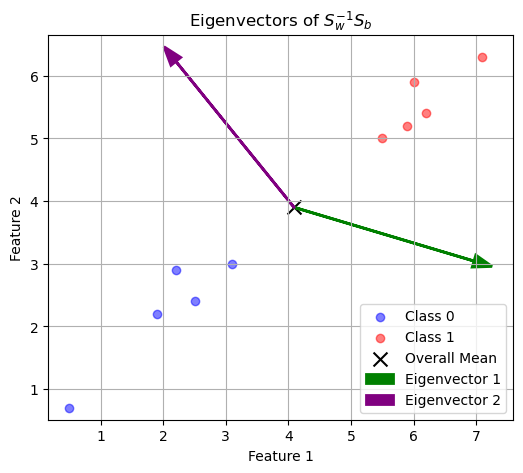

In [23]:
overall_mean = np.mean(data[:, :-1], axis=0)

plt.figure(figsize=(6, 5))
# Plot data points (assuming two classes, you can adjust colors as needed)
plt.scatter(data[data[:, -1] == 0][:, 0], data[data[:, -1] == 0][:, 1], alpha=0.5, color='blue', label="Class 0")
plt.scatter(data[data[:, -1] == 1][:, 0], data[data[:, -1] == 1][:, 1], alpha=0.5, color='red', label="Class 1")
plt.scatter(overall_mean[0], overall_mean[1], color='black', marker='x', s=100, label="Overall Mean")
scale = 3.0

# eigvecs columns are eigenvectors.
for i in range(eigvecs.shape[1]):
    vec = eigvecs[:, i]
    # Draw an arrow from the overall mean in the direction of the eigenvector.
    plt.arrow(overall_mean[0], overall_mean[1],
              vec[0] * scale, vec[1] * scale,
              head_width=0.2, head_length=0.3,
              fc='green' if i%2==0 else 'purple', ec='green'if i%2==0 else 'purple', linewidth=2,
              label=f'Eigenvector {i+1}')
    
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Eigenvectors of $S_w^{-1}S_b$")
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

## Step 5: Select the optimal vector
The optimal vector for LDA is the one corresponding to the largest eigenvalue

In [20]:
# Step 5: Select the eigenvector corresponding to the largest eigenvalue
lda_vector = eigvecs[:, np.argmax(eigvals)] #Select column vector of the maximum eigenvalue
print("Optimal vector for LDA: \n",np.array_str(lda_vector,precision=2,suppress_small=True))

Optimal vector for LDA: 
 [ 0.96 -0.29]


# Step 6: Project data onto LDA
Reduce the dimension of dataset from 2 to 1 by projecting onto the LDA vector

$$ x'_i = v^T x_i $$

Or in compact matrix form:

$$ X' = X v $$

Projected data: 
 [1.709 0.279 1.278 1.191 2.112 5.001 4.166 4.396 4.061 3.84 ]


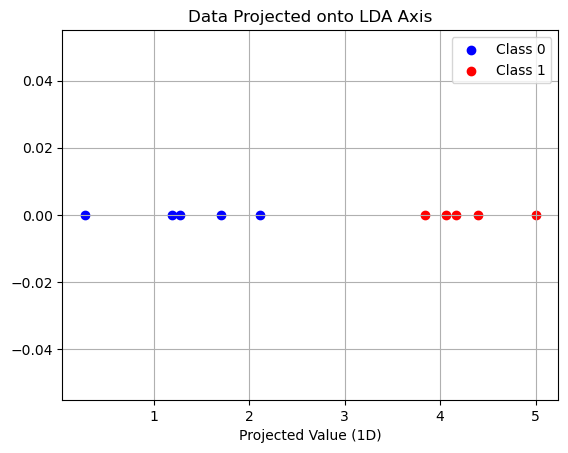

In [30]:
# Step 6: Project data onto LDA axis
X_projected = data[:, :-1] @ lda_vector
print("Projected data: \n",np.array_str(X_projected,precision=3,suppress_small=True))

plt.plot(figsize=(5,4))
plt.scatter(X_projected[data[:, -1] == 0], np.zeros_like(X_projected[data[:, -1] == 0]), color='blue', label='Class 0')
plt.scatter(X_projected[data[:, -1] == 1], np.zeros_like(X_projected[data[:, -1] == 1]), color='red', label='Class 1')

plt.xlabel("Projected Value (1D)")
plt.title("Data Projected onto LDA Axis")
plt.grid(True)
plt.legend()
plt.show()

## Step 7: Visualization

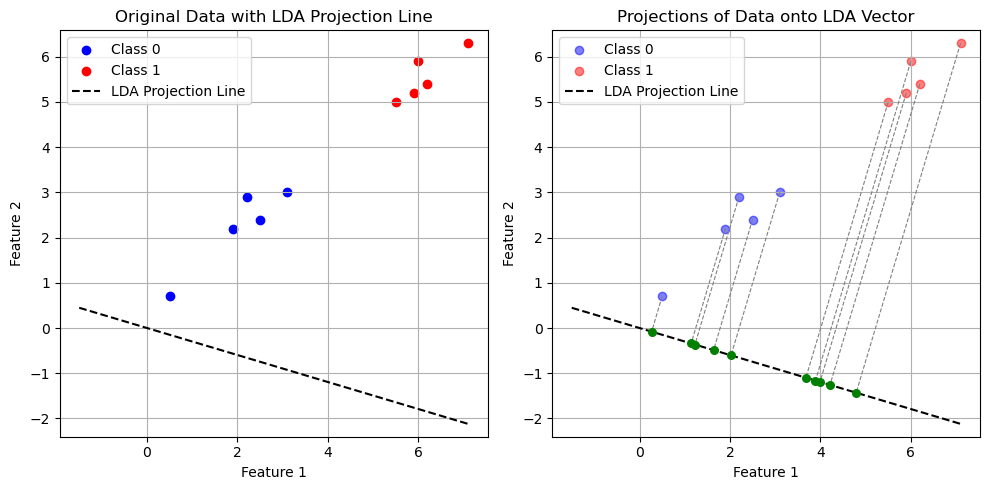

In [16]:
# Step 7: Visualization

plt.figure(figsize=(10, 5))
# Plot original data in 2D
plt.subplot(1, 2, 1)
plt.scatter(X_0[:, 0], X_0[:, 1], color='blue', label='Class 0')
plt.scatter(X_1[:, 0], X_1[:, 1], color='red', label='Class 1')

# Plot LDA projection line
line_x = np.linspace(min(data[:, 0])-2, max(data[:, 0]), 10)
line_y = (lda_vector[1] / lda_vector[0]) * line_x  # Line equation from LDA direction
plt.plot(line_x, line_y, 'k--', label='LDA Projection Line')

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.axis('equal')
plt.title("Original Data with LDA Projection Line")
plt.legend()

# Plot projections of data onto LDA vector in 2D space
plt.subplot(1, 2, 2)
plt.scatter(X_0[:, 0], X_0[:, 1], color='blue', alpha=0.5, label='Class 0')
plt.scatter(X_1[:, 0], X_1[:, 1], color='red', alpha=0.5, label='Class 1')

# Plot LDA projection line
line_x = np.linspace(min(data[:, 0])-2, max(data[:, 0]), 10)
line_y = (lda_vector[1] / lda_vector[0]) * line_x  # Line equation from LDA direction
plt.plot(line_x, line_y, 'k--', label='LDA Projection Line')

# Compute projections onto LDA vector
projections = np.dot(data[:, :-1], lda_vector[:, np.newaxis]) * lda_vector
    
# Plot projected points and lines connecting them to original points
for i in range(data.shape[0]):
    plt.plot([data[i, 0], projections[i, 0]], [data[i, 1], projections[i, 1]], 'gray', linestyle='--', linewidth=0.8)
    plt.scatter(projections[i, 0], projections[i, 1], color='green', s=30, zorder=3)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Projections of Data onto LDA Vector")
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.tight_layout()
plt.show()